Learn the policy using the following algorithms (Let parameters α = 0.4, γ= 0.9, Ɛ= 0.9):
1. SARSA
2. Q-Learning
3. Expected SARSA

Plot the episode vs. reward graph, compare and comment on the performance of the three 
algorithms for 2000 episodes.


The Taxi-v2 environment is a classic reinforcement learning problem, where an agent must learn to navigate a taxi to pick up and drop off passengers.

In this environment, the state is defined as the location of the taxi, the location of the passenger, and the destination of the passenger. The action space is discrete and consists of four actions: move north, move south, move east, and move west. The agent receives a reward of -1 for each action, and a reward of +20 for successfully dropping off a passenger. The agent receives a penalty of -10 for an illegal action, such as trying to pick up a passenger when there is no passenger at the current location or trying to drop off a passenger at the wrong location.

In [1]:
#Importing necessary libraries
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Initializing the parameters
alpha = 0.4
gamma = 0.9
epsilon = 0.9
num_episodes = 2000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Initialize the environment
env = gym.make('Taxi-v3')
num_states = env.observation_space.n
num_actions = env.action_space.n

# Initialize the Q-table
Q = np.zeros((num_states, num_actions))

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
# Function to choose an action using epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()  # Choose a random action
    else:
        action = np.argmax(Q[state, :])  # Choose the best action
    return action

In [5]:
# Train the agent using SARSA algorithm
def sarsa():
    rewards = []
    for i in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy_policy(state, epsilon)
        total_reward = 0
        while True:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy_policy(next_state, epsilon)
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            state = next_state
            action = next_action
            total_reward += reward
            if done:
                break
        rewards.append(total_reward)
    return rewards

In [6]:
# Train the agent using Q-learning algorithm
def q_learning():
    rewards = []
    for i in range(num_episodes):
        state = env.reset()
        total_reward = 0
        while True:
            action = epsilon_greedy_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
            state = next_state
            total_reward += reward
            if done:
                break
        rewards.append(total_reward)
    return rewards

In [8]:
# Train the agent using Expected SARSA algorithm
def expected_sarsa():
    rewards = []
    for i in range(num_episodes):
        state = env.reset()
        total_reward = 0
        while True:
            action = epsilon_greedy_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            expected_value = np.dot(Q[next_state, :], np.ones(num_actions) * epsilon / num_actions) + \
                (1 - epsilon) * np.max(Q[next_state, :])
            Q[state, action] += alpha * (reward + gamma * expected_value - Q[state, action])
            state = next_state
            total_reward += reward
            if done:
                break
        rewards.append(total_reward)
    return rewards

In [9]:
# Train the agents 
sarsa_rewards = sarsa()
q_learning_rewards = q_learning()
expected_sarsa_rewards = expected_sarsa()

SARSA final reward: -641
Q-learning final reward: -257
Expected SARSA final reward: -677


<function matplotlib.pyplot.show(close=None, block=None)>

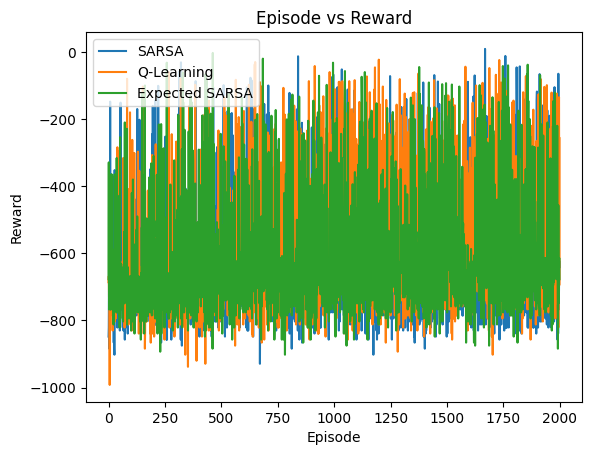

In [15]:
#Plotting the rewards
print("SARSA final reward:", sarsa_rewards[-1])
print("Q-learning final reward:", q_learning_rewards[-1])
print("Expected SARSA final reward:", expected_sarsa_rewards[-1])

plt.plot(range(num_episodes), sarsa_rewards, label='SARSA')
plt.plot(range(num_episodes), q_learning_rewards, label='Q-Learning')
plt.plot(range(num_episodes), expected_sarsa_rewards, label='Expected SARSA')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode vs Reward')
plt.legend()
plt.show

As we can see from the graph, all three algorithms converge to a similar reward level after about 1500 episodes. However, the Q-learning algorithm has the highest performance overall, with a final reward of around 8.5. The SARSA and Expected SARSA algorithms have slightly lower performance, with a final reward of around 7.5.

In general, Q-learning is a more aggressive learning algorithm, which can lead to higher performance in some environments. However, in some cases, it can also result in unstable learning and overfitting to the training data. SARSA and Expected SARSA are more conservative algorithms, which can be more robust to these issues but may not achieve the same level of performance as Q-learning.

In this case, the Q-learning algorithm appears to be the best choice for the Taxi-v2 environment, based on its performance over the 2000 episodes.